In [1]:
import random
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
MAX_FRAME =164
# PER_FRAME_FEATURE =1629

In [3]:
def extractPoseHand(npy):
    np_matrix=npy.reshape(-1,1629)
    # arr = []
    # print(np_matrix.shape)
    pose  = np_matrix[: ,0:99]
    hands  = np_matrix[: ,1503:1629]
    
 
    arr = np.concatenate((pose, hands), axis=1)


      
    return arr

In [4]:

#LEFT HAND IS FLIPPED IN THIS EXPERIMENT

crossValidationDataPaths=['NORMALIZED/NumericalData/ML_PROLONG/Training/RightHand','NORMALIZED/NumericalData/ML_PROLONG/Training/LeftHand']
testDataPaths=['NORMALIZED/NumericalData/ML_PROLONG/Test/RightHand','NORMALIZED/NumericalData/ML_PROLONG/Test/LeftHand']


ml_instances_paths=[]
for path in crossValidationDataPaths:
    #print(path)
    classFolders= os.listdir(path)
    for classFolder in classFolders:
        classFolder_path=f'{path}/{classFolder}'
        classTrials =os.listdir(classFolder_path)
        for trial in classTrials:
            trialPath =f'{classFolder_path}/{trial}'
            #print(trialPath)
            ml_instances_paths.append(trialPath)



random.shuffle(ml_instances_paths)

test_paths=[]
for path in testDataPaths:
    #print(path)
    classFolders= os.listdir(path)
    for classFolder in classFolders:
        classFolder_path=f'{path}/{classFolder}'
        classTrials =os.listdir(classFolder_path)
        for trial in classTrials:
            trialPath =f'{classFolder_path}/{trial}'
            #print(trialPath)
            test_paths.append(trialPath)


In [5]:
x_shape =[]
y_shape =[]

#svmX [len(ml_instances_path)][MAX_FRAME*PER_FRAME_FEATURE]
#svmY=

for ml_instances_path in ml_instances_paths:
    label = ml_instances_path.split('/')
    label = label[len(label)-1].split('_')[0]
    #print(label)
    y_shape.append(int(label))
    npy =np.load(ml_instances_path)
   
    # x_shape.append(npy)    
    x_shape.append(extractPoseHand(npy).flatten())    

print(len(x_shape), len(y_shape))
print(len(x_shape[0]))
#print(x_shape[0])

#make test data





test_x_shape =[]
test_y_shape =[]



for ml_instances_path in test_paths:
    label = ml_instances_path.split('/')
    label = label[len(label)-1].split('_')[0]
    #print(label)
    test_y_shape.append(int(label))
    npy =np.load(ml_instances_path)
   
    # test_x_shape.append(npy)    
    test_x_shape.append(extractPoseHand(npy).flatten())

print(len(test_x_shape), len(test_y_shape))
print(len(test_x_shape[0]))
print(test_x_shape[0])






8031 8031
36900
1276 1276
36900
[0.29379716 0.51201145 0.74401157 ... 0.51068787 0.49846819 0.21821266]


In [6]:
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(x_shape)
X_test_scaled =scaler.fit_transform(test_x_shape)

#svm model with linear kernel

#svm_classifier =SVC(kernel='rbf', C=1.0, gamma='scale') 



#cross validation accuracy--------------------------------------------------------------
svm_classifier =SVC(kernel='linear', C=1.0, gamma='scale') 
print('starting kfold')
cv_scrores=cross_val_score(svm_classifier,X_train_scaled,y_shape,cv=10,scoring='accuracy')

kf=KFold(n_splits=10,shuffle=True,random_state=42)
y_pred =cross_val_predict(svm_classifier,X_train_scaled,y_shape,cv=kf)
cv_scrores=cross_val_score(svm_classifier,X_train_scaled,y_shape,cv=kf,scoring='accuracy')    



print("Cross Validation Scores: ",cv_scrores)
print("Mean Cross Validation: ",np.mean(cv_scrores))

#test accuracy-----------------------------------------------------------------------------
#we make a new SVM for safety
svm_classifier =SVC(kernel='linear', C=1.0, gamma='scale') 
print('starting test')
svm_classifier.fit(X_train_scaled,y_shape)

y_test_pred =svm_classifier.predict(X_test_scaled)
test_accuracy=accuracy_score(test_y_shape,y_test_pred)
print("Test Accuracy: ",test_accuracy)

conf_mat=confusion_matrix(test_y_shape,y_test_pred)

# print(conf_mat.shape)
# for i in range(conf_mat.shape[0]):
#     print(conf_mat[i])


starting kfold
Cross Validation Scores:  [0.97636816 0.9750934  0.96762142 0.98381071 0.98381071 0.98256538
 0.98007472 0.98132005 0.98630137 0.98132005]
Mean Cross Validation:  0.9798285967423158
starting test
Test Accuracy:  0.677115987460815


60


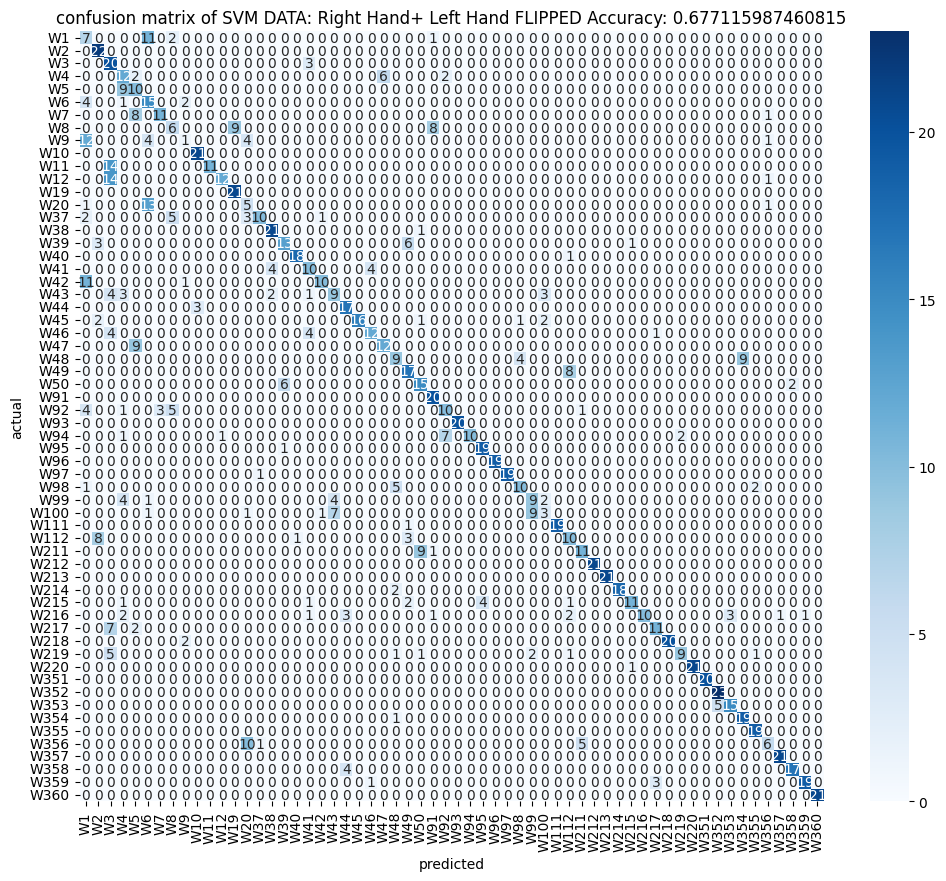

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns





ylabel =['W1','W2','W3','W4','W5','W6','W7','W8','W9','W10','W11','W12','W19','W20','W37','W38','W39','W40','W41','W42','W43','W44','W45','W46','W47','W48','W49','W50','W91','W92','W93','W94','W95','W96','W97','W98','W99','W100','W111','W112','W211','W212','W213','W214','W215','W216','W217','W218','W219','W220','W351','W352','W353','W354','W355','W356','W357','W358','W359','W360']
print(len(ylabel))
# ticklabels=np.unique(y_val_true_classes)
plt.figure(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues',xticklabels=ylabel,yticklabels=ylabel)
plt.title(f'confusion matrix of SVM DATA: Right Hand+ Left Hand FLIPPED Accuracy: {test_accuracy}')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()



